### Fitting a Michaelis-Menten model and drawing the results in R ###
This is a description of how to use the R language to do a nonlinear fit of enzyme kinematic data.
I have some data for the enzyme acid phosphatase binding to PNPP substrate of various concentration of the substrate. The table shows my data.
|$$Substrate \\\ \mu M$$|$$V_0 \\\ \mu M/sec $$|
|-------------------|--------------------------|
|9.998|0.041|
|25|0.047|
|50|0.060|
|100|0.071|
|250|0.057|
|500|0.082|
|1000|0.139|
|1875|0.126|

We can load this data table into an R structure

In [1]:
mm <- structure(list(S = c(9.998, 25, 50, 100, 1000, 1875),
                     v = c(0.041, 0.047, 0.060, 0.071, 0.139, 0.126)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mm)

         S     v
1    9.998 0.041
2   25.000 0.047
3   50.000 0.060
4  100.000 0.071
5 1000.000 0.139
6 1875.000 0.126


Now we can import a couple of libraries

In [2]:
library(drc) # for fitting Michaelis Menten model
library(ggplot2) # for drawing

Loading required package: MASS


'drc' has been loaded.


Please cite R and 'drc' if used for a publication,

for references type 'citation()' and 'citation('drc')'.



Attaching package: ‘drc’


The following objects are masked from ‘package:stats’:

    gaussian, getInitial




In [3]:
model.drm <- drm (v ~ S, data = mm, fct = MM.2())

mml <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mml$v <- predict(model.drm, newdata = mml)

In [4]:
sd <- c(0.064346717, 0.007778175, 0.032526912, 0.009192388, 0.014849242, 0.034648232)

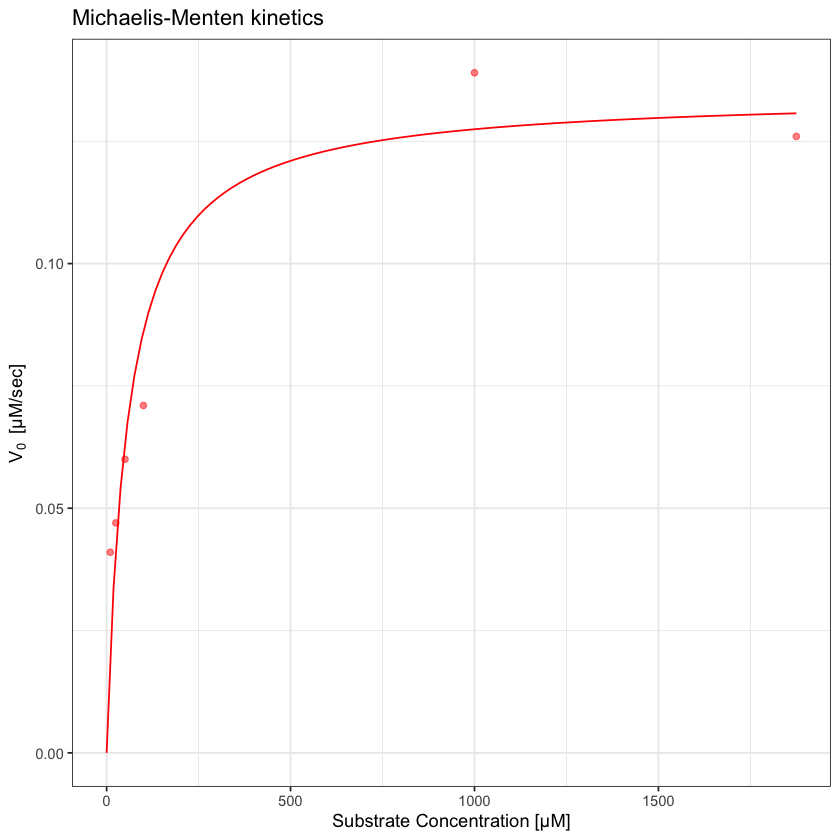

In [5]:
ggplot(mm, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [μM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "red") +
  geom_line(data = mml, aes(x = S, y = v), colour = "red")

In [6]:
ggsave("mm.pdf", width = 6, height = 4, device = cairo_pdf)

In [7]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mm, 
                 start = list(K = max(mm$v)/2, Vm = max(mm$v)))

In [8]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
K  56.37950   18.41773   3.061 0.037616 *  
Vm  0.13464    0.01161  11.594 0.000316 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01462 on 4 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 2.302e-06


Inhibition by ion Br-

The data for NaBr

In [9]:
mmBr <- structure(list(S = c(7.531538317, 18.83239171, 37.66478343, 188.3239171, 753.2956685, 1412.429379),
                     v = c(0.022916667, 0.020833333, 0.052314815, 0.085416667, 0.090046296, 0.098842593)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mmBr)


            S          v
1    7.531538 0.02291667
2   18.832392 0.02083333
3   37.664783 0.05231482
4  188.323917 0.08541667
5  753.295669 0.09004630
6 1412.429379 0.09884259


In [10]:
model.drm <- drm (v ~ S, data = mmBr, fct = MM.2())

mmlBr <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mmlBr$v <- predict(model.drm, newdata = mmlBr)

In [11]:
sdBr <- c(0.018659762, 0.015222438, 0.001636821, 0.0048613591, 0.014567709, 0.014567709) # standard dev. of velocity

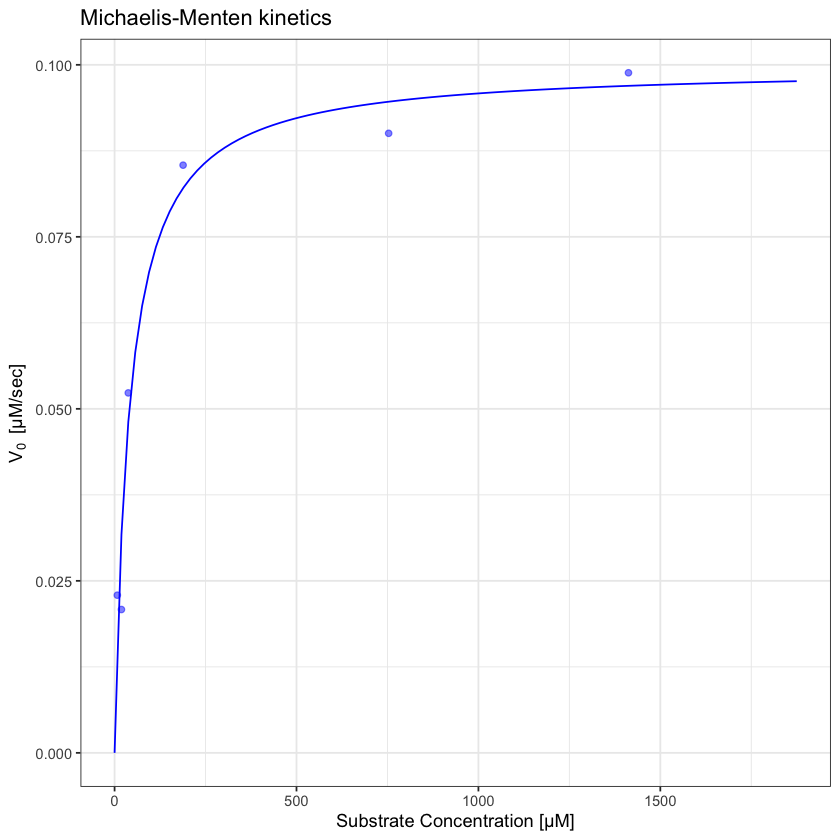

In [12]:
ggplot(mmBr, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "blue") +
  #geom_errorbar(aes(ymin=v-sdBr, ymax=v+sdBr), width=.2,
   #              position=position_dodge(0.05))+
  geom_line(data = mmlBr, aes(x = S, y = v), colour = "blue")

In [13]:
ggsave("mmBr.pdf", width = 6, height = 4,device = cairo_pdf)

In [14]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmBr, 
                 start = list(K = max(mmBr$v)/2, Vm = max(mmBr$v)))

In [15]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  40.507520   9.865613   4.106   0.0148 *  
Vm  0.099727   0.005562  17.930 5.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007484 on 4 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 8.767e-07


The data for NaNO<sub>3</sub>


In [16]:
mmNO3 <- structure(list(S = c(8.017076373, 20.04670883, 40.09341766, 80.18683533, 200.4670883, 801.8683533),
                     v = c(0.009259259, 0.014583333, 0.018981481, 0.031944444, 0.030787037, 0.044212963)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
print(mmNO3)

           S           v
1   8.017076 0.009259259
2  20.046709 0.014583333
3  40.093418 0.018981481
4  80.186835 0.031944444
5 200.467088 0.030787037
6 801.868353 0.044212963


In [17]:
model.drm <- drm (v ~ S, data = mmNO3, fct = MM.2())

mmlNO3 <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mmlNO3$v <- predict(model.drm, newdata = mmlNO3)

In [18]:
sdNO3 <- c(0.007365696, 0.001636821, 0.004092053, 0.004255735, 0.0045831, 0.008675153)

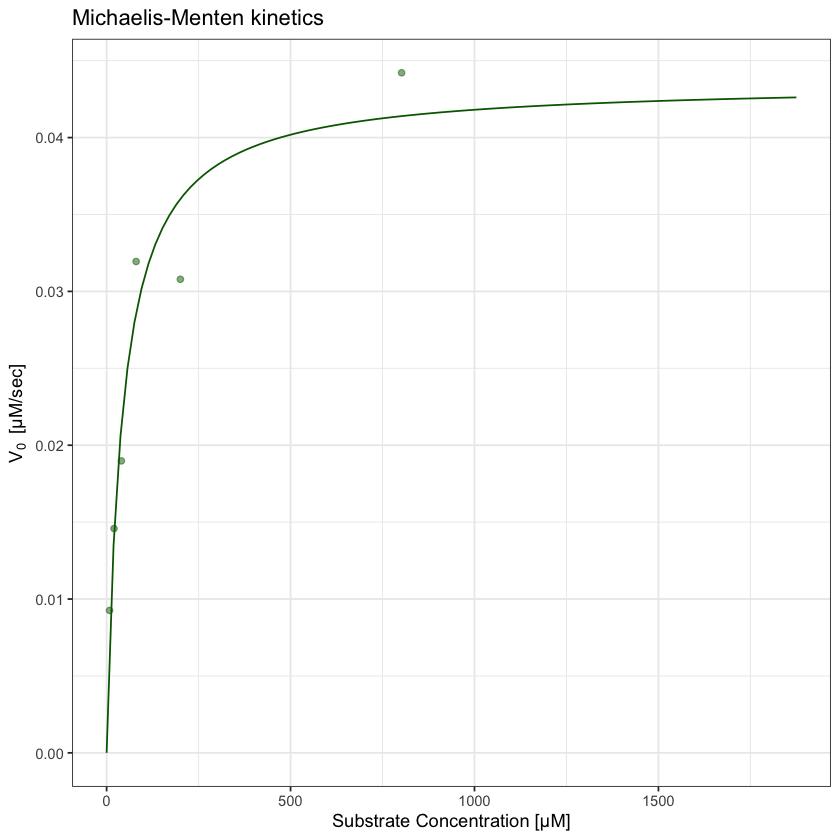

In [19]:
ggplot(mmNO3, aes(x = S, y = v)) +
  theme_bw() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ylab("Speed [dE/sec]") +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "dark green") +
  #geom_errorbar(aes(ymin=v-sdNO3, ymax=v+sdNO3), width=.2,
   #              position=position_dodge(0.05))+
  geom_line(data = mmlNO3, aes(x = S, y = v), colour = "dark green")

In [20]:
ggsave("mmNO3.pdf", width = 6, height = 4,device = cairo_pdf)

In [21]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmNO3, 
                 start = list(K = max(mmNO3$v)/2, Vm = max(mmNO3$v)))

In [22]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  42.081462  12.449403    3.38 0.027780 *  
Vm  0.043567   0.003752   11.61 0.000314 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003783 on 4 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 9.656e-06


#### SO<sub>4</sub><sup>2-</sup>  inhibitor #### 

In [23]:
mmSO4 <- structure (list(S = c(9.140767824, 22.85714286, 45.71428571, 91.42857143, 228.5714286, 457.1428571, 914.2857143, 1714.285714),
                    v = c(0.003225309, 0.026080247, 0.034953704, 0.036959877, 0.042901235, 0.058179012, 0.05617284, 0.081095679)),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 8L))
#mmSO4 <- structure (list(S = c(9.140767824, 22.85714286, 45.71428571, 228.5714286, 457.1428571, 1714.285714),
 #                   v = c(0.003225309, 0.026080247, 0.034953704,  0.042901235, 0.058179012, 0.081095679)),
  #                  .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 6L))
#print(mmSO4)

In [24]:
model.drm <- drm (v ~ S, data = mmSO4, fct = MM.2())

mmlSO4 <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mmlSO4$v <- predict(model.drm, newdata = mmlSO4)

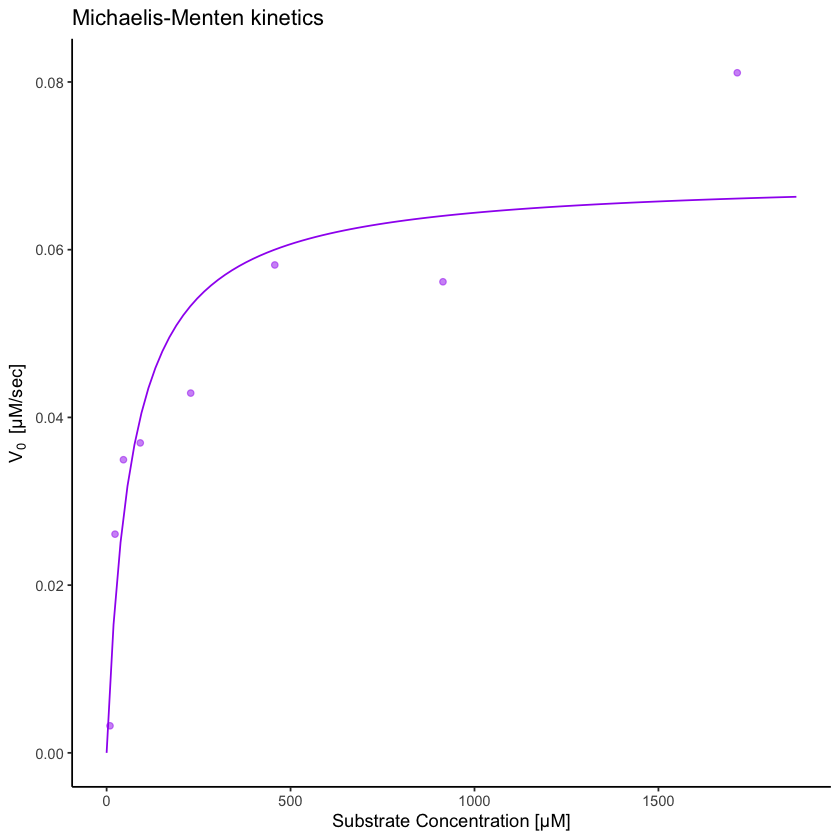

In [25]:
ggplot(mmSO4, aes(x = S, y = v)) +
  theme_classic() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ylab("Speed [dE/sec]") +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "purple") +
  geom_line(data = mmlSO4, aes(x = S, y = v), colour = " purple")

In [26]:
ggsave("mmSO4.pdf", width = 6, height = 4,device = cairo_pdf)

In [27]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmSO4, 
                 start = list(K = max(mmSO4$v)/2, Vm = max(mmSO4$v)))

In [28]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  65.673493  27.797512   2.363   0.0561 .  
Vm  0.068631   0.006922   9.914 6.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009573 on 6 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 5.796e-06


#### PO<sub>4</sub><sup>-</sup>  inhibitor #### 

In [29]:
mmPO4 <- structure( list(S = c(9.997500625, 25, 50, 100, 250, 500, 1000, 1875),
                     v = c(0.0034606481,0.021412037, 0.010648148, 0.045949074, 0.066666667, 0.050347222, 0.107175926, 0.107986111 )),
                    .Names = c("S", "v"), class = "data.frame", row.names = c(NA, 8L))
print(mmPO4)

            S           v
1    9.997501 0.003460648
2   25.000000 0.021412037
3   50.000000 0.010648148
4  100.000000 0.045949074
5  250.000000 0.066666667
6  500.000000 0.050347222
7 1000.000000 0.107175926
8 1875.000000 0.107986111


In [30]:
model.drm <- drm (v ~ S, data = mmPO4, fct = MM.2())

mmlPO4 <- data.frame(S = seq(0, max(mm$S), length.out = 100))
mmlPO4$v <- predict(model.drm, newdata = mmlPO4)

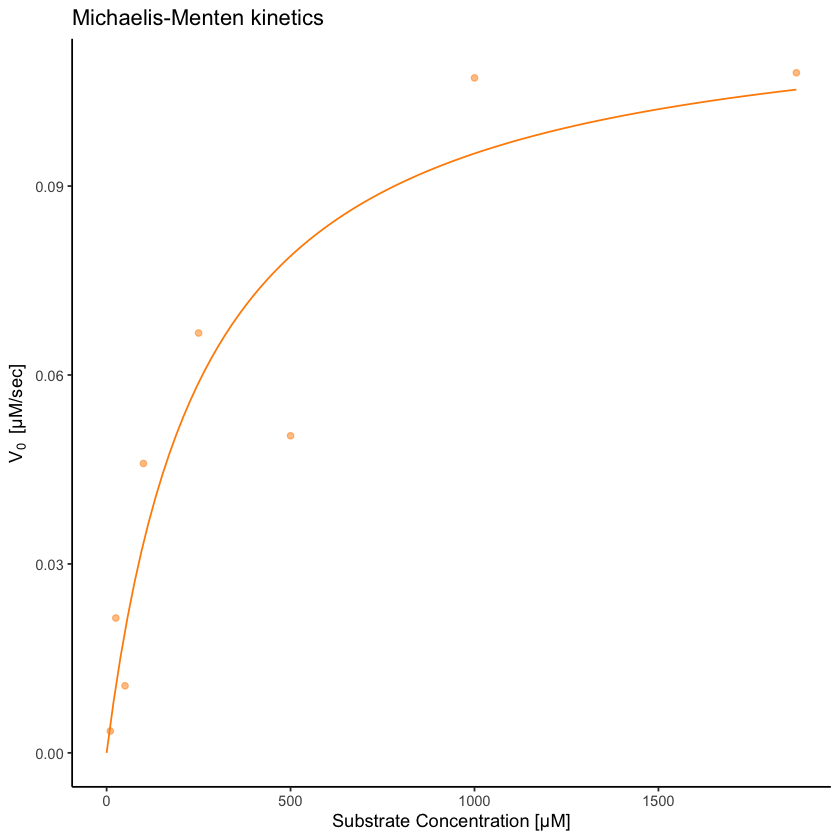

In [31]:
ggplot(mmPO4, aes(x = S, y = v)) +
  theme_classic() +
  xlab("Substrate Concentration [\u03BCM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ylab("Speed [dE/sec]") +
  ggtitle("Michaelis-Menten kinetics") +
  geom_point(alpha = 0.5, colour = "dark orange") +
  geom_line(data = mmlPO4, aes(x = S, y = v), colour = " dark orange")

In [32]:
ggsave("mmPO4.pdf", width = 6, height = 4,device = cairo_pdf)

In [33]:
model.nls <- nls(v ~ Vm * S/(K+S), data = mmPO4, 
                 start = list(K = max(mmPO4$v)/2, Vm = max(mmPO4$v)))

In [34]:
summary(model.nls)


Formula: v ~ Vm * S/(K + S)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
K  260.12657  130.66343   1.991 0.093610 .  
Vm   0.11993    0.01901   6.310 0.000739 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01518 on 6 degrees of freedom

Number of iterations to convergence: 12 
Achieved convergence tolerance: 3.244e-06


#### Making a combo plot ####

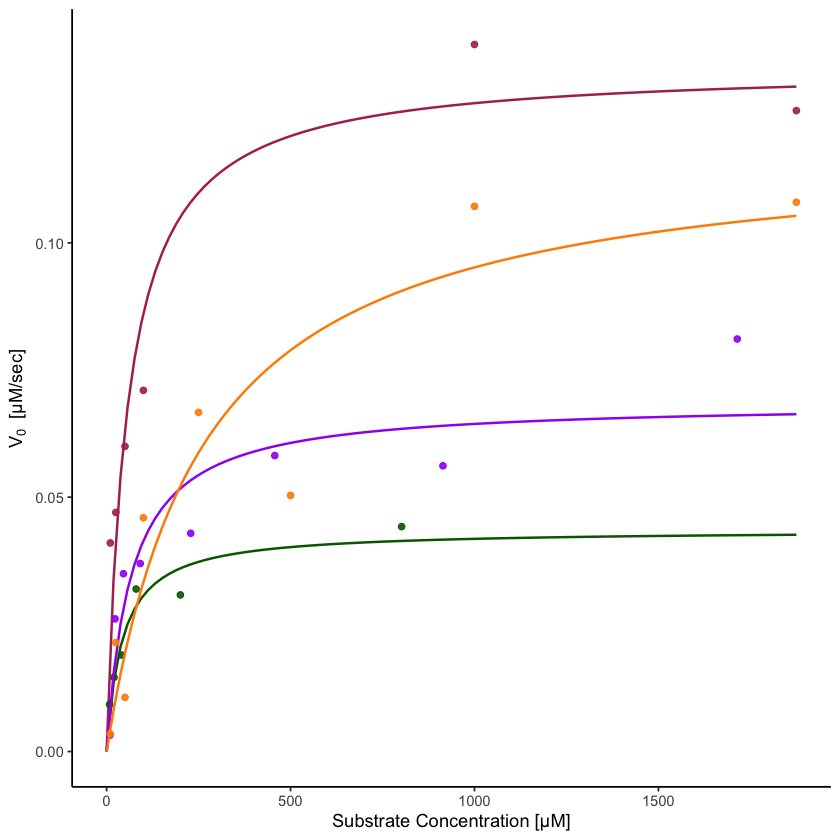

In [35]:
ggplot(mm, aes(x = S, y = v)) +
  theme_classic() +
  xlab("Substrate Concentration [μM]") +
  ylab(bquote(V[0]~" [μM/sec]")) +
  #ggtitle("Michaelis-Menten kinetics") +
  geom_point(data = mm, alpha = 0.9, colour = "maroon") +
  geom_line(data = mml, aes(x = S, y = v), colour = "maroon", linewidth = 0.7) +
  #geom_point(data = mmBr, alpha = 0.9, colour = "dark blue") +
  #geom_line(data = mmlBr, aes(x = S, y = v), colour = "darkblue", linewidth = 0.7)+
  geom_point(data = mmNO3, alpha = 0.9, colour = "dark green") +
  geom_line(data = mmlNO3, aes(x = S, y = v), colour = "dark green", linewidth = 0.7)+
  geom_point(data = mmSO4, alpha = 0.9, colour = "purple") +
  geom_line(data = mmlSO4, aes(x = S, y = v), colour = "purple", linewidth = 0.7)+
  geom_point(data = mmPO4, alpha = 0.9, colour = "dark orange") +
  geom_line(data = mmlPO4, aes(x = S, y = v), colour = "dark orange", linewidth = 0.7)

In [36]:
ggsave("mmAllComb.pdf", width = 6, height = 4, device = cairo_pdf) #write to pdf